In [116]:
# All project packages imported at the start

# Project packages
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt 
import seaborn as sns

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge, RidgeCV, ElasticNet
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge

In [117]:
# Reading data using pandas
train = pd.read_csv("./data/train.csv")
test  = pd.read_csv("./data/test.csv")

In [118]:
# Checking columns
train.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [119]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [120]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [121]:
print("Train : "+str(train.shape))

# Checking for duplicates
unique_id = len(set(train.Id))
total_id = train.shape[0]
dup_id = total_id - unique_id
print(str(dup_id)+" duplicates available in this dataset")

Train : (1460, 81)
0 duplicates available in this dataset


In [122]:
train_ID = train['Id']
test_ID = test['Id']

# Deleting the ID Column as its not needed for this prediction
train.drop('Id',axis=1,inplace = True)
test.drop('Id', axis=1, inplace = True)

# Checking shape after dropping the ID column
print("Train Data: "+str(train.shape))
print("Test Data: "+str(test.shape))

Train Data: (1460, 80)
Test Data: (1459, 79)


In [123]:
numerical_features = train.select_dtypes(exclude = ['object']).columns
categorical_features = train.select_dtypes(include = ['object']).columns

# Data Processing
## Checking for Outliers

Text(0.5,0,'GrLivArea')

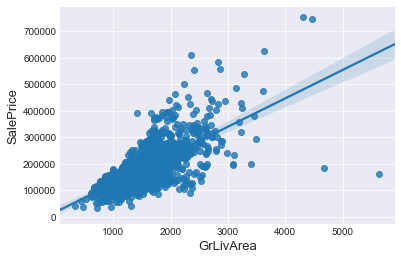

In [124]:
# Looking for extreme outliers
sns.set_style('darkgrid')
fig, ax = plt.subplots()
sns.regplot(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

Two extreme outliers can be seen in the dataset, and so these will be deleted

In [125]:
# Dropping the extreme outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Text(0.5,0,'GrLivArea')

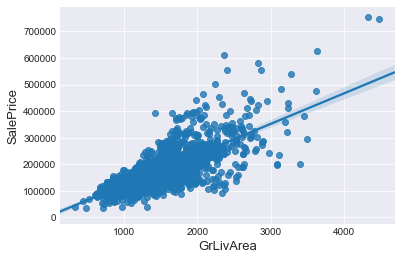

In [126]:
# Displaying scatter plot with outliers removed
fig, ax = plt.subplots()
sns.regplot(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

And so now, the outliers have been removed from the dataset.

# Sales Price Target Variable

In [127]:
train.SalePrice.describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


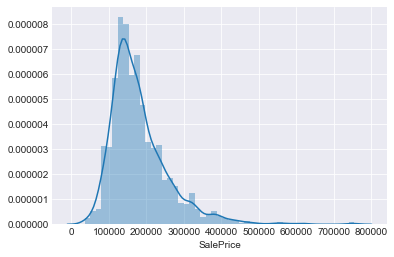

In [128]:
# PLotting Histogram for 'SalePrice'
sns.distplot(train['SalePrice'])

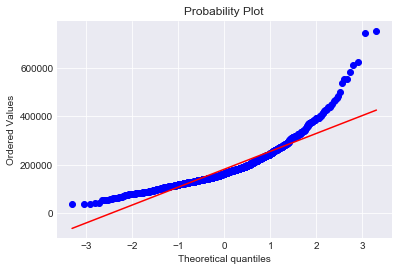

In [129]:
# Plot SalePrice as a QQPlot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [130]:
# Applying a log(1+x) transformation to SalePrice
train["SalePrice"] = np.log1p(train["SalePrice"])

Mu : 12.02
Sigma : 0.40


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


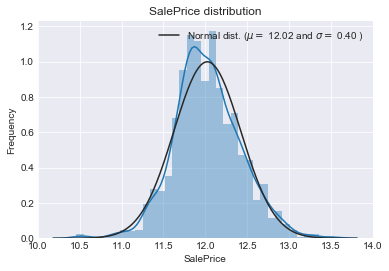

In [131]:
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print("Mu : {:.2f}\nSigma : {:.2f}".format(mu,sigma))

# Plot Sale Price
sns.distplot(train['SalePrice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

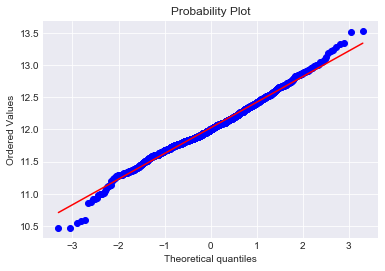

In [132]:
# Plot SalePrice as a QQPlot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [133]:
# Saving train & test shapes
train_n = train.shape[0]
test_n = test.shape[0]

# Creating y_train variable
y_train = train.SalePrice.values

# New dataset all encompassing data
all_data = pd.concat((train, test), sort=True).reset_index(drop=True)

# Dropping the target
all_data.drop(['SalePrice'], axis=1, inplace=True)

# Printing shape of all_data
print("all_data size is: {}".format(all_data.shape))

all_data size is: (2917, 79)


# Dealing with Missing Data
## Total/Percentage of Missing Values

In [134]:
all_data_na_values = all_data.isnull().sum()
all_data_na_values = all_data_na_values.drop(all_data_na_values[all_data_na_values == 0].index).sort_values(ascending=False)[:30]
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na,'Missing Values' :all_data_na_values})
missing_data.head(30)

,Missing Ratio,Missing Values
PoolQC,99.691464,2908
MiscFeature,96.400411,2812
Alley,93.212204,2719
Fence,80.425094,2346
FireplaceQu,48.680151,1420
LotFrontage,16.660953,486
GarageQual,5.450806,159
GarageCond,5.450806,159
GarageFinish,5.450806,159
GarageYrBlt,5.450806,159


Text(0.5,1,'Percentage of Missing Data by Features')

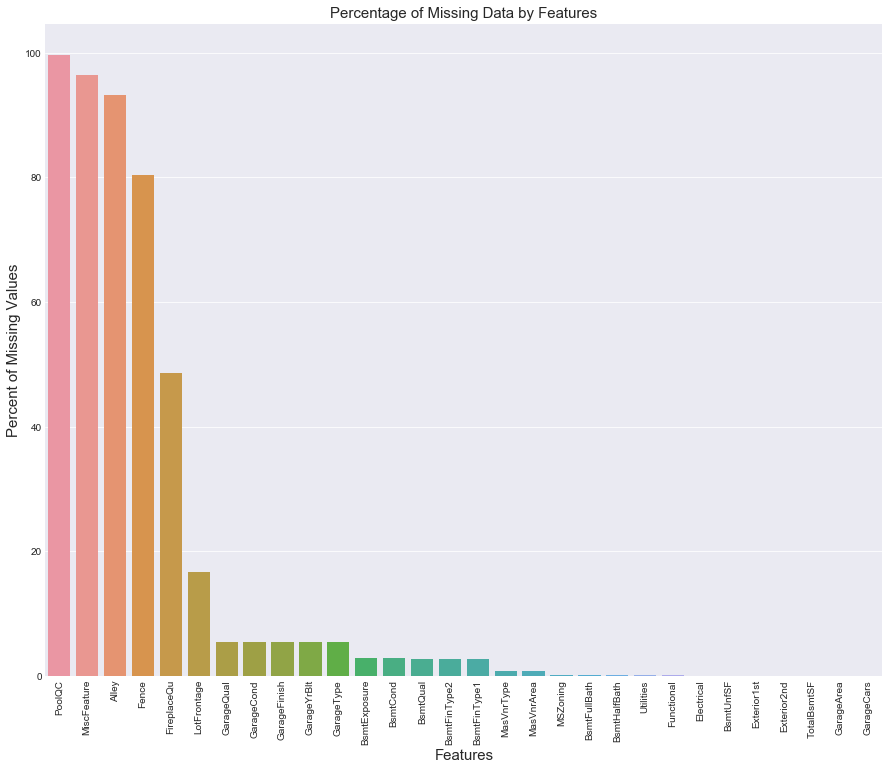

In [135]:
# Visualising missing data
plt.subplots(figsize = (15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percentage of Missing Data by Features', fontsize=15)

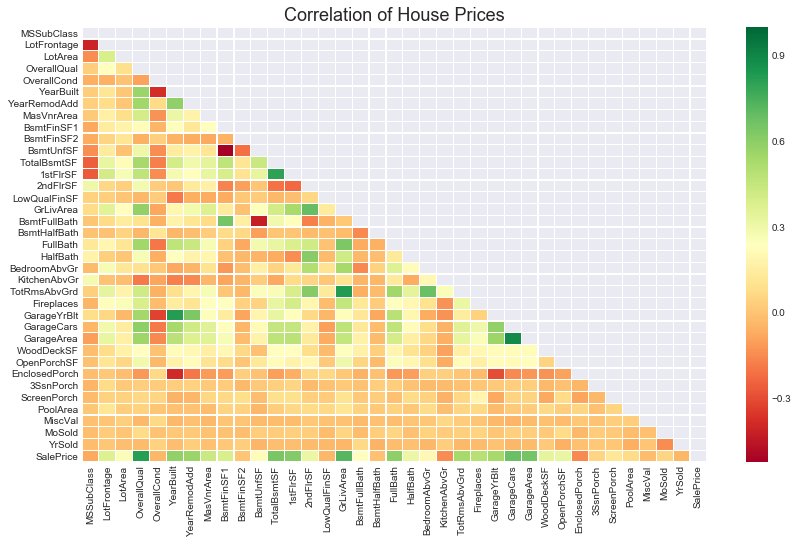

In [136]:
# Initiate correlation matrix
corr = train.corr()
# Set-up mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set-up figure
plt.figure(figsize=(14, 8))
# Title
plt.title('Correlation of House Prices', fontsize=18)
# Correlation matrix
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

## Filling in the Missing Data

In [137]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

In [138]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

In [139]:
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [140]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [141]:
all_data_na_values = all_data.isnull().sum()
all_data_na_values = all_data_na_values.drop(all_data_na_values[all_data_na_values == 0].index).sort_values(ascending=False)[:30]
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na,'Missing Values' :all_data_na_values,'Data_type':all_data_na.dtype})
missing_data.head()

,Missing Ratio,Missing Values,Data_type


All the missing data has now been filled in, as seen in the above table check, this is the desired outcome we want.

# Converting Variables

In [142]:
# Converting those variables which should be categorical, rather than numeric
# MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


# Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


# Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [143]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# Process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# Shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


In [144]:
# Adding Total sqfoot feature
all_data['TotalSF'] = all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']

In [145]:
num = all_data.dtypes[all_data.dtypes != 'object'].index

#Skew all the Numerical Features
skew_feat = all_data[num].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

sk = pd.DataFrame({'Skewness' :skew_feat})
sk.head(10)

,Skewness
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [146]:
#should/need to define categorical columns list
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 222)


In [147]:
train_new = all_data[:train_n]
test_new = all_data[train_n:]
print(train_new.shape)
print(test_new.shape)

(1458, 222)
(1459, 222)


In [148]:
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.1,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

regr.fit(train_new,y_train)

y_pred = regr.predict(train_new)
y_test = train['SalePrice']

score_xgb = np.sqrt(mean_squared_error(y_test, y_pred))

print("XGB Score :", score_xgb) 

y_pred_xgb = regr.predict(test_new)

y_pred_xgb = np.exp(y_pred_xgb)

pred_df = pd.DataFrame(y_pred_xgb, index=test_ID, columns=["SalePrice"])
pred_df.to_csv('submission.csv', header=True, index_label='Id')

XGB Score : 0.04047048826650116


In [149]:
model_lasso = Lasso(alpha=0.0005,normalize=True, max_iter=1e5)
model_lasso.fit(train_new,y_train)
y_pred_lasso = model_lasso.predict(train_new)
score_lasso = np.sqrt(mean_squared_error(y_train, y_pred_lasso))
print("Lasso Score :", score_lasso)

y_pred_lasso_test = model_lasso.predict(test_new)
y_pred_lasso_test = np.exp(y_pred_lasso_test)

Lasso Score : 0.12674003054252517


In [150]:
model_rd = Ridge(alpha = 4.84)
model_rd.fit(train_new,y_train)
y_pred_rd = model_rd.predict(train_new)
score_rd = np.sqrt(mean_squared_error(y_train, y_pred_rd))
print("Ridge Score :",score_rd)

y_pred_rd_test = model_rd.predict(test_new)
y_pred_rd_test = np.exp(y_pred_rd_test)

Ridge Score : 0.09817211938488175


In [151]:
model_enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3, tol=0.001)
model_enet.fit(train_new,y_train)
y_pred_enet = model_enet.predict(train_new)
score_enet = np.sqrt(mean_squared_error(y_train, y_pred_enet))
print("ElasticNet Score :",score_enet)

y_pred_enet_test = model_enet.predict(test_new)
y_pred_enet_test = np.exp(y_pred_enet_test)

ElasticNet Score : 0.10172008368298953


In [152]:
model_rf = RandomForestRegressor(n_estimators = 12,max_depth = 3,n_jobs = -1)
model_rf.fit(train_new,y_train)
y_pred_rf = model_rf.predict(train_new)
score_rf = np.sqrt(mean_squared_error(y_train, y_pred_rf))
print("RandomForest Score :",score_rf)

y_pred_rf_test = model_rf.predict(test_new)
y_pred_rf_test = np.exp(y_pred_rf_test)

RandomForest Score : 0.17559552682460233


In [153]:
model_gb = GradientBoostingRegressor(n_estimators = 40,max_depth = 2)
model_gb.fit(train_new,y_train)
y_pred_gb = model_gb.predict(train_new)
score_gb = np.sqrt(mean_squared_error(y_train, y_pred_gb))
print("GradientBoosting Score :",score_gb)

y_pred_gb_test = model_gb.predict(test_new)
y_pred_gb_test = np.exp(y_pred_gb_test)

GradientBoosting Score : 0.13079046381054646


In [154]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
model_ad = AdaBoostRegressor(dt, learning_rate = 0.1, n_estimators=300,random_state= None)
model_ad.fit(train_new,y_train)
y_pred_ad = model_ad.predict(train_new)
score_ad = np.sqrt(mean_squared_error(y_train, y_pred_ad))
print("AdaBoost Model :",score_ad)

y_pred_ad_test = model_ad.predict(test_new)
y_pred_ad_test = np.exp(y_pred_ad_test)

AdaBoost Model : 0.11974726664424142


In [155]:
score_avg =  (score_xgb + score_lasso + score_rd + score_enet + score_rf + score_gb + score_ad) / 7
print("Average Score :", score_avg)

Average Score : 0.11331942559375541
